<a href="https://colab.research.google.com/github/snehal2000-s/Task-8--Timeline-Analysis-Covid-19/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 8:-Timeline Analysis : Covid-19

● Create a storyboard showing spread of Covid-19 cases in your country or
any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

**Dataset:** Daily updated .csv file on https://bit.ly/30d2gdi

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [5]:
#Reading the Data
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
covid_data.shape

(97125, 60)

In [7]:
covid_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
97120,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97121,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97122,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97123,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97124,ZWE,Africa,Zimbabwe,2021-06-20,41779.0,151.0,260.000,1672.0,6.0,5.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [8]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [9]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.379100e+04,93788.000000,92773.000000,8.371500e+04,83871.000000,92773.000000,93291.000000,93288.000000,92278.000000,83228.000000,...,58913.00000,87273.000000,89467.000000,68300.000000,67301.000000,43853.000000,79544.000000,92234.000000,87453.000000,3407.000000
mean,1.021130e+06,6045.394528,6076.465454,2.787145e+04,147.062644,132.128506,12564.886038,76.062465,76.448893,279.840160,...,13.39504,258.368930,7.917168,10.555190,32.684493,50.846035,3.028535,73.236382,0.727500,18.243505
std,7.016247e+06,37923.891812,37690.538056,1.661730e+05,804.556963,746.545766,23307.127070,199.359032,159.019222,508.912958,...,19.95607,118.985677,4.130194,10.449277,13.482180,31.759760,2.459491,7.558644,0.150367,36.225191
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,0.10000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.198000e+03,2.000000,7.429000,5.200000e+01,0.000000,0.000000,250.031000,0.207000,1.270250,7.863000,...,0.60000,167.295000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.295000
50%,1.309200e+04,73.000000,91.000000,3.670000e+02,2.000000,1.286000,1707.761000,8.229000,10.899000,49.765000,...,2.20000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000,7.390000
75%,1.384760e+05,801.000000,842.286000,3.606000e+03,18.000000,14.286000,12915.547000,70.308000,78.885500,303.670000,...,21.20000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.795000
max,1.784874e+08,906008.000000,826389.571000,3.866158e+06,18050.000000,14737.000000,179149.680000,18293.675000,4083.500000,5768.618000,...,77.60000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,409.690000


In [10]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   231
continent                                    6
location                                   231
date                                       537
total_cases                              51677
new_cases                                12659
new_cases_smoothed                       24420
total_deaths                             19869
new_deaths                                2991
new_deaths_smoothed                       6822
total_cases_per_million                  72788
new_cases_per_million                    40897
new_cases_smoothed_per_million           46244
total_deaths_per_million                 45656
new_deaths_per_million                    7745
new_deaths_smoothed_per_million           9154
reproduction_rate                          364
icu_patients                              2575
icu_patients_per_million                  5512
hosp_patients                             4996
hosp_patients_per_million                 9196
weekly_icu_ad

In [11]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                     0
continent                                 4570
location                                     0
date                                         0
total_cases                               3334
new_cases                                 3337
new_cases_smoothed                        4352
total_deaths                             13410
new_deaths                               13254
new_deaths_smoothed                       4352
total_cases_per_million                   3834
new_cases_per_million                     3837
new_cases_smoothed_per_million            4847
total_deaths_per_million                 13897
new_deaths_per_million                   13741
new_deaths_smoothed_per_million           4847
reproduction_rate                        19158
icu_patients                             87335
icu_patients_per_million                 87335
hosp_patients                            84952
hosp_patients_per_million                84952
weekly_icu_ad

In [12]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           25035
Asia             23042
Europe           23022
North America    11989
South America     5847
Oceania           3620
Name: continent, dtype: int64

**Analyzing cases worldwide**

In [13]:

dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
759,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1241,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1723,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
2199,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
2657,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
3257,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN
3794,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
4271,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776,NaN
4871,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# looking at different locations
covid_data["location"].value_counts()

Argentina                          537
Mexico                             537
Thailand                           534
Peru                               532
Taiwan                             522
                                  ... 
Cook Islands                        22
Palau                               21
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Pitcairn                             1
Name: location, Length: 231, dtype: int64

In [15]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

**Data Visualization**

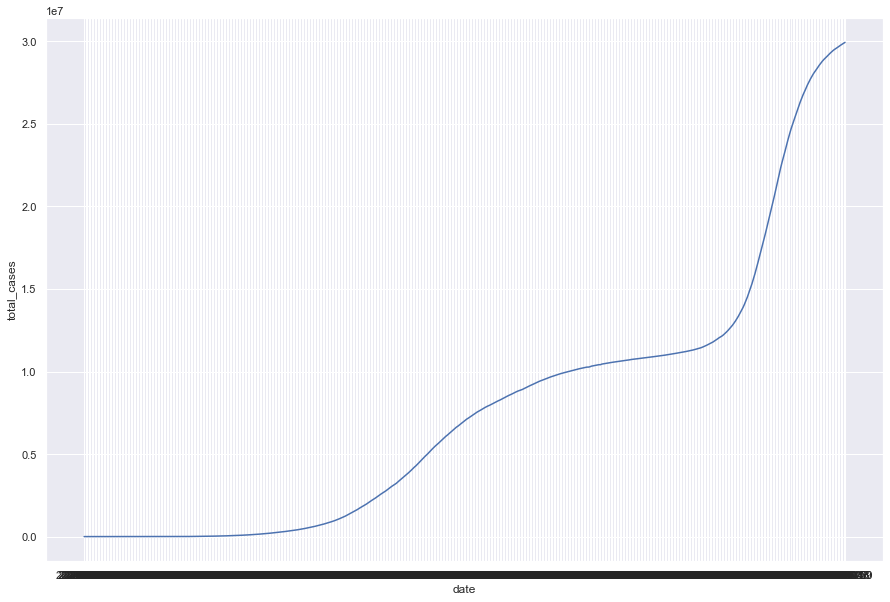

In [16]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [17]:
india_last_5_days=india.tail()

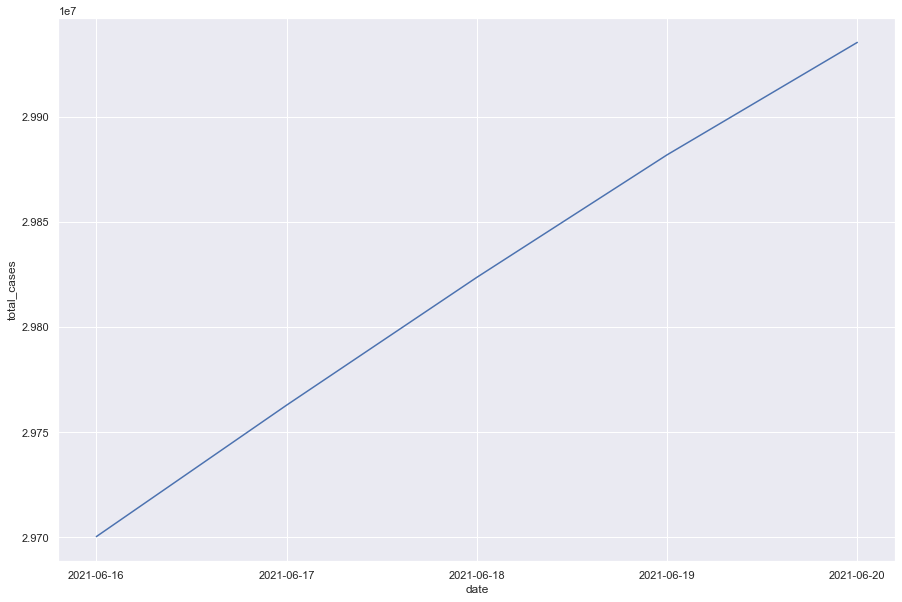

In [18]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

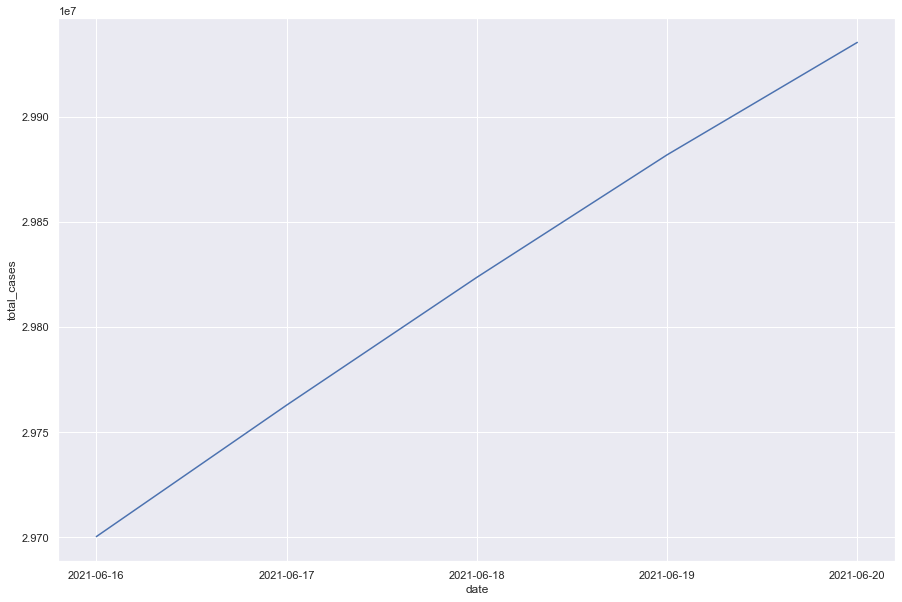

In [19]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

**Covid cases in Brazil**

In [20]:
# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]

In [21]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12357,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12358,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12359,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12360,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12361,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [22]:
brazil_last_5_days=brazil.tail()


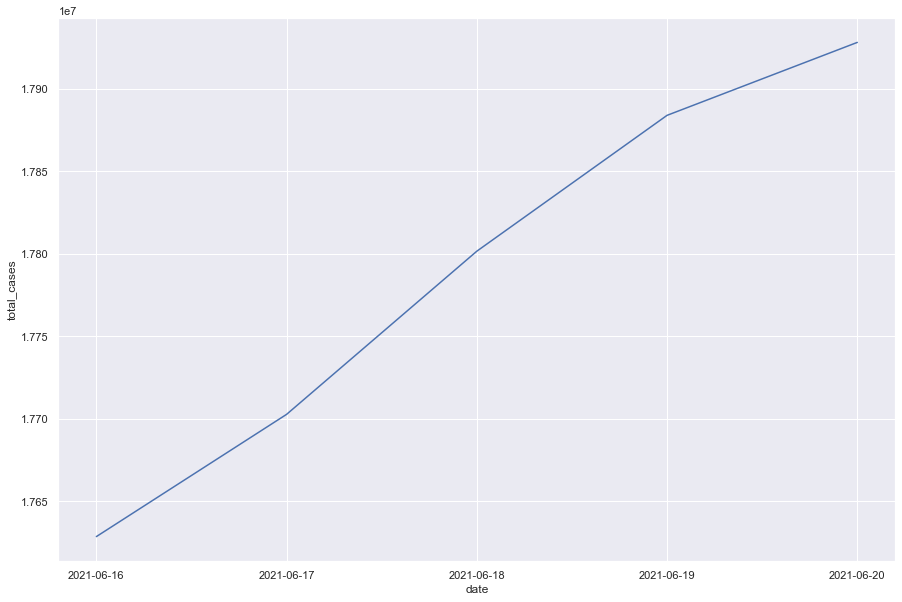

In [23]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [24]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

**Total Cases**

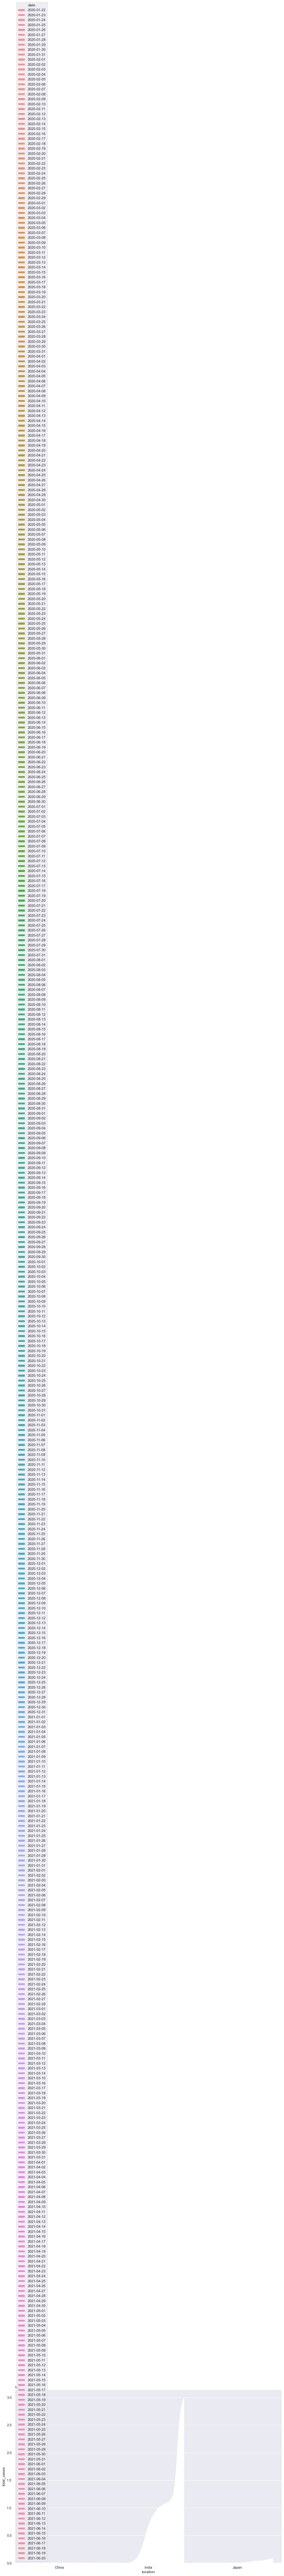

In [25]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [26]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

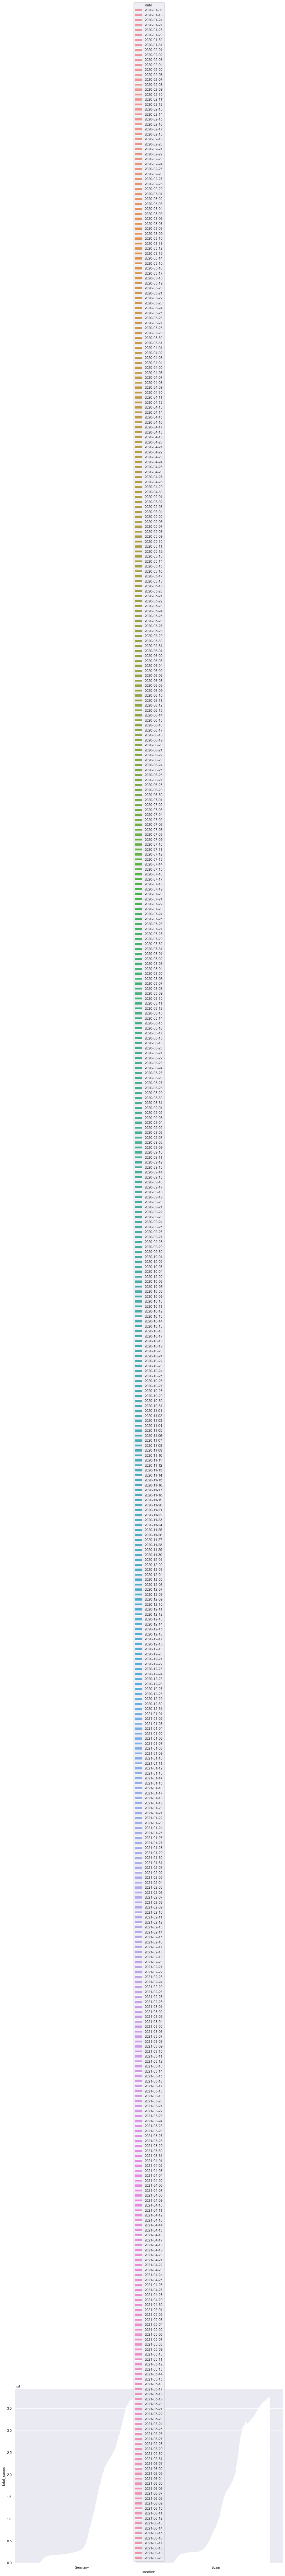

In [27]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()


In [28]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
792,OWID_AFR,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
1756,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2232,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94984,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN
95585,OWID_WRL,NaN,World,2020-12-18,75790546.0,720325.0,645856.000,1734682.0,12926.0,11642.571,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
96022,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
96482,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [29]:


max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
95585,OWID_WRL,NaN,World,2020-12-18,75790546.0,720325.0,645856.000,1734682.0,12926.0,11642.571,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
29538,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,OWID_NAM,NaN,North America,2020-12-18,20252290.0,277402.0,243884.429,468038.0,3940.0,3534.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4904,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92382,USA,North America,United States,2020-12-18,17575536.0,251832.0,221064.286,318553.0,2974.0,2716.429,...,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94005,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
79597,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567,NaN
55387,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704,NaN
74542,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715,NaN


In [30]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
29538,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,OWID_NAM,NaN,North America,2020-12-18,20252290.0,277402.0,243884.429,468038.0,3940.0,3534.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4904,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92382,USA,North America,United States,2020-12-18,17575536.0,251832.0,221064.286,318553.0,2974.0,2716.429,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
30053,OWID_EUN,NaN,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


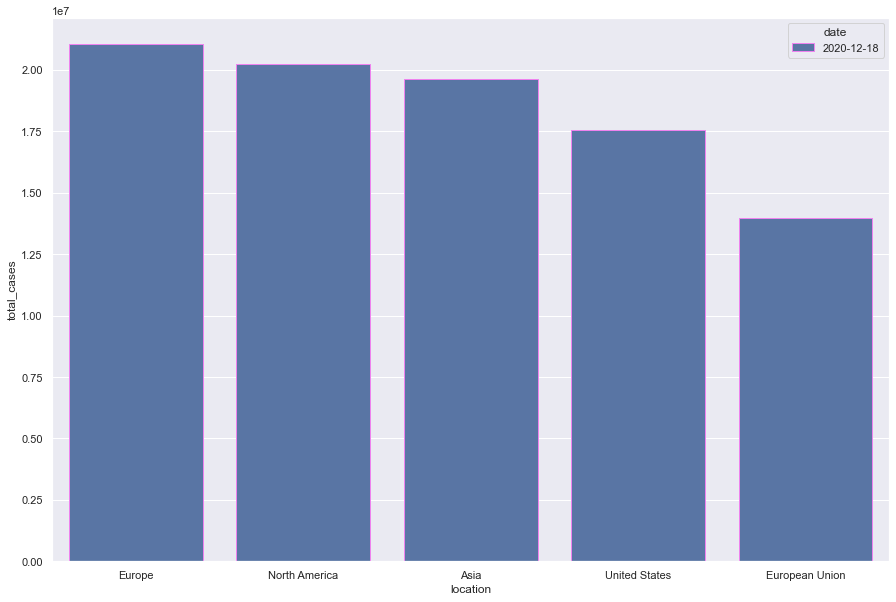

In [31]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date",  edgecolor='violet')
plt.show()